In [17]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import getLinearReg

sys.path.append('./settings')
from mpl_settings_v3 import *

data_dir = '../data'
figs_dir = '../figures'
draft_figs_dir = '../draft/figures'

spacing = 'Log'

In [251]:
Nc = 10
spacing = 'Log'
iterations = 1000
samples = 100
xmin = 0.1
xmax = 10
k = 4
N_values = [500, 1000, 2000, 4000, 8000, 16000]
data = []
for N in N_values:
    
    csv_file_name = 'N{}_Nc{}_k{:.2f}_xmin{:.4f}_xmax{:.4f}_samples{}_it{}_{}.csv'.format(
        N, Nc, k, xmin, xmax, samples, iterations, spacing
    )
    full_csv_file_name = os.path.join(data_dir, csv_file_name)
    if not os.path.isfile(full_csv_file_name):
        print(full_csv_file_name)
        continue
        
    df = pd.read_csv(full_csv_file_name)

    mean_df = df.groupby(by='pin').mean()
    std_df = df.groupby(by='pin').std()  

    pin_values = mean_df.index
    qin_values = k / (Nc-1) - pin_values 
    
    S1_values = mean_df.Ngcc / N
    N2_values = mean_df.Nsec
    meanS_values = mean_df.meanS

    std_S1_values = std_df.Ngcc / N
    std_N2_values = std_df.Nsec
    std_meanS_values = std_df.meanS
    
    N2_idxmax = N2_values.idxmax()
    meanS_idxmax = meanS_values.idxmax()
    
    row = [N, N2_values[N2_idxmax], std_N2_values[N2_idxmax],
        meanS_values[meanS_idxmax], std_meanS_values[meanS_idxmax]
    ]
    data.append(row)
max_df = pd.DataFrame(data, columns=['N', 'N2', 'N2std', 'meanS', 'meanSstd'])
max_df

../data/N16000_Nc10_k4.00_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv


,N,N2,N2std,meanS,meanSstd
0,500,57.359,26.244712,26.998469,15.042511
1,1000,92.489,43.383938,34.690481,18.819650
2,2000,152.089,77.011206,45.065903,23.080250
3,4000,246.406,130.149130,57.321388,30.278007
4,8000,392.180,231.381825,71.741713,45.198753


../data/N16000_Nc10_k4.00_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv


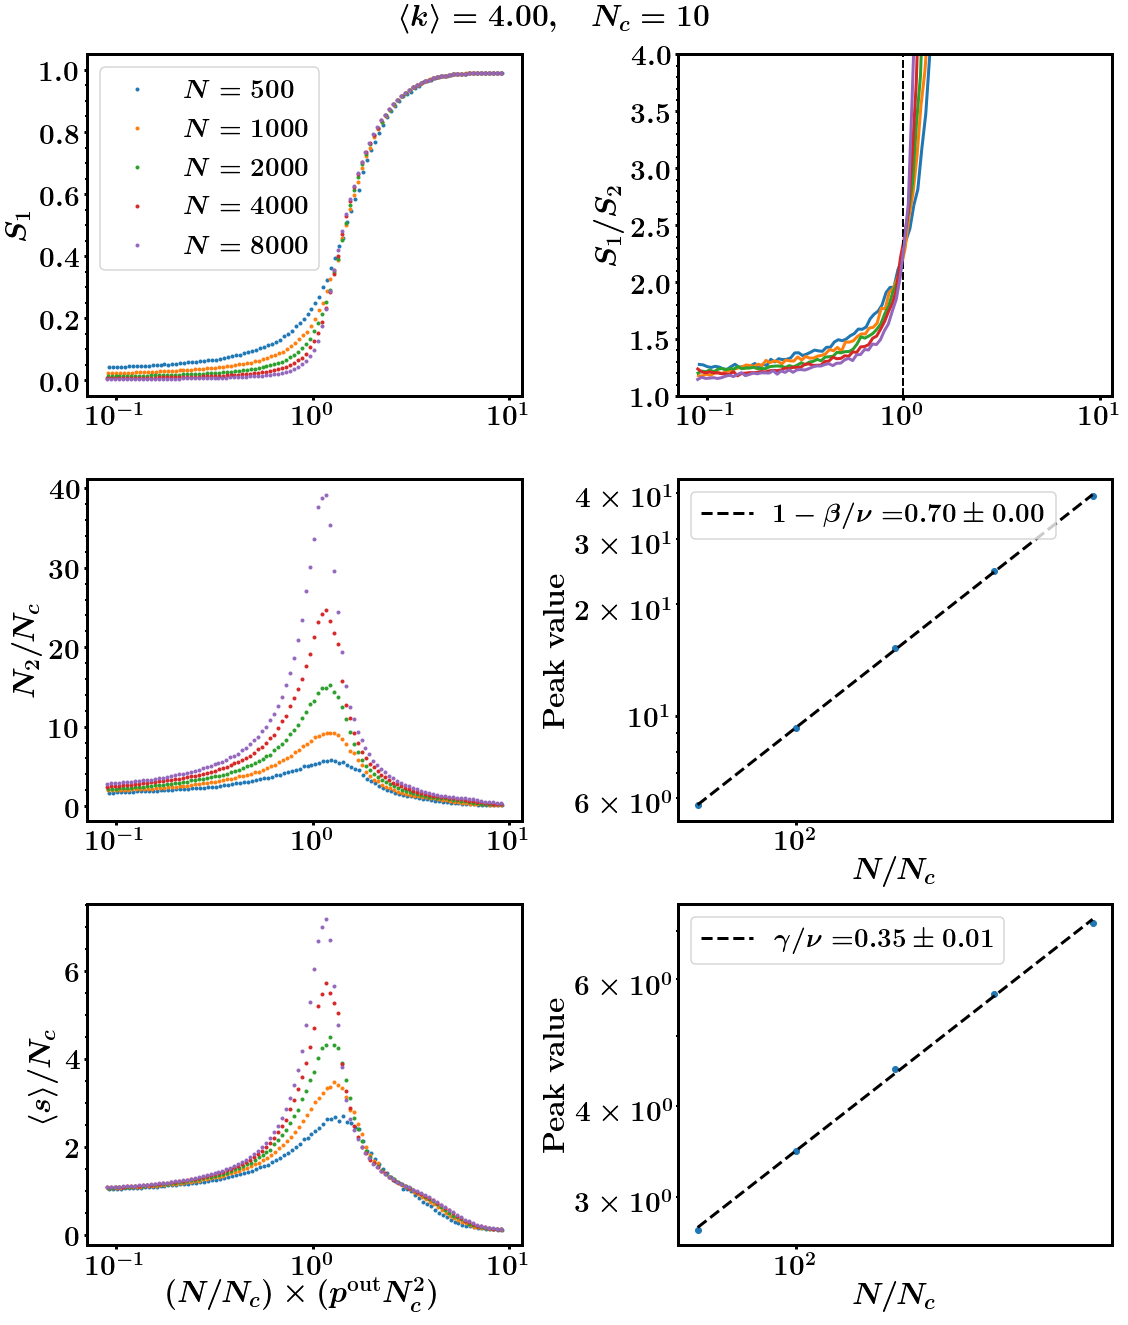

In [252]:
ncols = 2
nrows = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)  

fig.suptitle(r'$\langle k \rangle = {{{:.2f}}},\quad N_c = {{{}}}$'.format(k, Nc), fontsize=30,
             y=1.02)

for ax in axes[:,0]:
    ax.set_xscale('log')

for N in N_values:

    csv_file_name = 'N{}_Nc{}_k{:.2f}_xmin{:.4f}_xmax{:.4f}_samples{}_it{}_{}.csv'.format(
        N, Nc, k, xmin, xmax, samples, iterations, spacing
    )
    full_csv_file_name = os.path.join(data_dir, csv_file_name)
    if not os.path.isfile(full_csv_file_name):
        print(full_csv_file_name)
        continue
        
    df = pd.read_csv(full_csv_file_name)
    
    mean_df = df.groupby(by='pin').mean()
    std_df = df.groupby(by='pin').std()  

    pin_values = mean_df.index
    qin_values = k / (Nc-1) - pin_values
    pout_values = qin_values * (Nc-1) / (N-Nc)
    
    S1_values = mean_df.Ngcc / N
    N2_values = mean_df.Nsec
    meanS_values = mean_df.meanS

    std_S1_values = std_df.Ngcc / N
    std_N2_values = std_df.Nsec
    std_meanS_values = std_df.meanS

    #X = qin_values * Nc**2
    X = (pout_values * Nc**2) * (N/Nc)

    ax = axes[0,0]
    ax.set_ylim(-0.05, 1.05)
    ax.set_ylabel(r'$S_1$')
    ax.plot(X, S1_values, '.', label=r'$N={{{}}}$'.format(N))

    ax = axes[1,0]
    ax.set_ylabel(r'$N_2/N_c$')
    ax.plot(X, N2_values/Nc, '.')
    
    ax = axes[2,0]
    ax.set_ylabel(r'$\langle s \rangle/N_c$')
    #ax.set_xlabel(r'$q^{\mathrm{in}} N_c^2$')
    ax.set_xlabel(r'$(N/N_c) \times (p^{\mathrm{out}} N_c^2)$')
    ax.plot(X, meanS_values/Nc, '.')
    
    ax = axes[0,1]
    ax.set_ylim(1., 4.)
    ax.set_xscale('log')
    ax.set_ylabel(r'$S_1/S_2$')
    ax.axvline(1, linestyle='--', color='k', linewidth=2)
    ax.plot(X, N*S1_values/N2_values)
    
axes[0,0].legend(loc='best')
ax = axes[1,1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N/N_c$')
#ax.set_ylabel(r'$N_{2,\mathrm{max}}/N_c$')
ax.set_ylabel(r'$\mathrm{Peak\;value}$')
ax.plot(max_df.N/Nc, max_df.N2/Nc, 'o', label='')
Y_pred, slope, slope_err, r2 = getLinearReg(max_df.N, max_df.N2/Nc)
ax.plot(max_df.N/Nc, Y_pred, '--', color='k', 
        label=r'$1-\beta/\nu =$' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, slope_err))
ax.legend()

ax = axes[2,1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$N/N_c$')
#ax.set_ylabel(r'$\langle s \rangle_{\mathrm{max}}$')
ax.set_ylabel(r'$\mathrm{Peak\;value}$')
ax.plot(max_df.N/Nc, max_df.meanS/Nc, 'o', label='')
Y_pred, slope, slope_err, r2 = getLinearReg(max_df.N, max_df.meanS/Nc)
ax.plot(max_df.N/Nc, Y_pred, '--', color='k', 
        label=r'$\gamma/\nu =$' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, slope_err))
ax.legend()

    
plt.tight_layout()
fig_name = 'scaling_k{:.2f}_Nc{}_it{}_samples{}_{}'.format(
        k, Nc, iterations, samples, spacing
)
plt.savefig(os.path.join(figs_dir, fig_name) + '.png')
plt.savefig(os.path.join(draft_figs_dir, fig_name) + '.pdf')
plt.show()

../data/N2000_Nc40_k0.50_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.10_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.20_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.30_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.40_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.60_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.70_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.80_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.90_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k3.50_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k5.00_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k8.00_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv


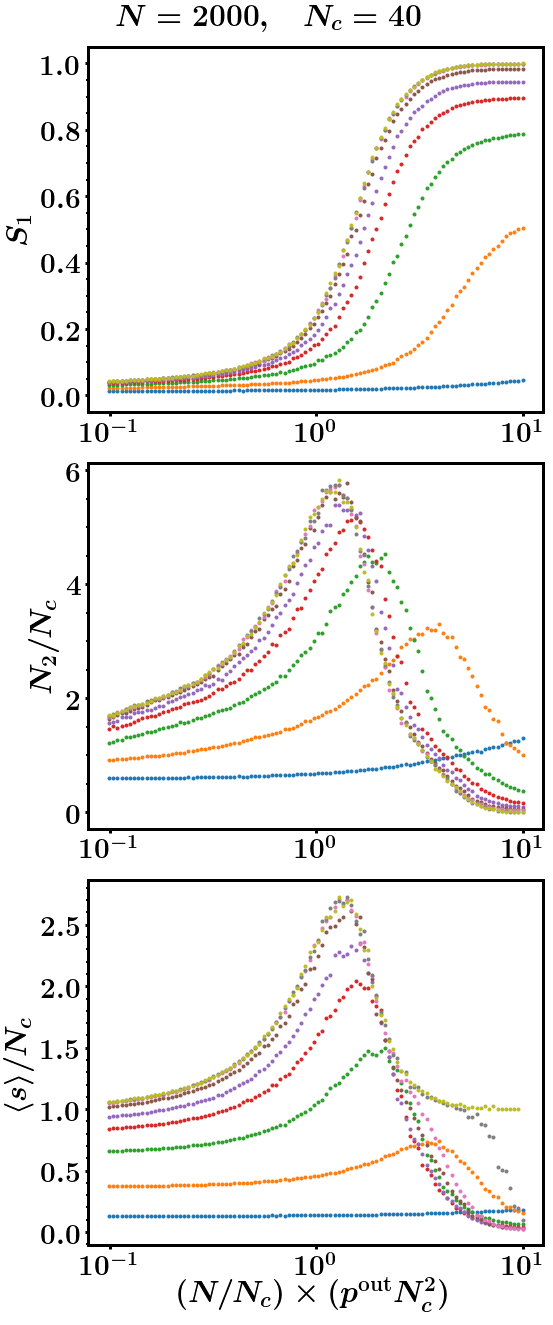

In [266]:
Nc = 40
spacing = 'Log'
iterations = 1000
samples = 100
xmin = 0.1
xmax = 10
k_values = [0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.5, 3, 3.5, 4, 5, 6, 8, 10, 18]
#k_values = [1.2, 1.5, 2, 3, 4, 5, 6, 8]
N = 2000

ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)  

fig.suptitle(r'$N = {{{}}},\quad N_c = {{{}}}$'.format(N, Nc), fontsize=30,
             y=1.02)

for ax in axes:
    ax.set_xscale('log')

for k in k_values:
    
    eta = -1
    kc = 0
    #prefactor = (k-kc)**eta
    #prefactor = 1 + 2*np.exp(-2*k)
    #prefactor = 1 + 2*k**eta
    prefactor = 1
    
    csv_file_name = 'N{}_Nc{}_k{:.2f}_xmin{:.4f}_xmax{:.4f}_samples{}_it{}_{}.csv'.format(
        N, Nc, k, xmin, xmax, samples, iterations, spacing
    )
    full_csv_file_name = os.path.join(data_dir, csv_file_name)
    if not os.path.isfile(full_csv_file_name):
        print(full_csv_file_name)
        continue
        
    df = pd.read_csv(full_csv_file_name)
    
    mean_df = df.groupby(by='pin').mean()
    std_df = df.groupby(by='pin').std()  

    pin_values = mean_df.index
    qin_values = k / (Nc-1) - pin_values
    pout_values = qin_values * (Nc-1) / (N-Nc)
    
    S1_values = mean_df.Ngcc / N
    N2_values = mean_df.Nsec
    meanS_values = mean_df.meanS

    std_S1_values = std_df.Ngcc / N
    std_N2_values = std_df.Nsec
    std_meanS_values = std_df.meanS

    X = (pout_values * Nc**2) * (N/Nc)

    ax = axes[0]
    ax.set_ylim(-0.05, 1.05)
    ax.set_ylabel(r'$S_1$')
    ax.plot(X, prefactor*S1_values, '.', label=r'$k={{{}}}$'.format(k))

    ax = axes[1]
    ax.set_ylabel(r'$N_2/N_c$')
    ax.plot(X, prefactor*N2_values/Nc, '.')
    
    ax = axes[2]
    ax.set_ylabel(r'$\langle s \rangle/N_c$')
    ax.set_xlabel(r'$(N/N_c) \times (p^{\mathrm{out}} N_c^2)$')
    ax.plot(X, prefactor*meanS_values/Nc, '.')
    
#axes[0].legend(loc='best')

plt.tight_layout()
plt.show()

In [267]:
data = []
for k in k_values:
    
    csv_file_name = 'N{}_Nc{}_k{:.2f}_xmin{:.4f}_xmax{:.4f}_samples{}_it{}_{}.csv'.format(
        N, Nc, k, xmin, xmax, samples, iterations, spacing
    )
    full_csv_file_name = os.path.join(data_dir, csv_file_name)
    if not os.path.isfile(full_csv_file_name):
        print(full_csv_file_name)
        continue
        
    df = pd.read_csv(full_csv_file_name)

    mean_df = df.groupby(by='pin').mean()
    std_df = df.groupby(by='pin').std()  

    pin_values = mean_df.index
    qin_values = k / (Nc-1) - pin_values 
    #pout_values = qin_values * (Nc-1) / (N-Nc)
    #X = (pout_values * Nc**2) * (N/Nc)
    
    S1_values = mean_df.Ngcc / N
    N2_values = mean_df.Nsec
    meanS_values = mean_df.meanS

    std_S1_values = std_df.Ngcc / N
    std_N2_values = std_df.Nsec
    std_meanS_values = std_df.meanS
    
    N2_idxmax = N2_values.idxmax()
    meanS_idxmax = meanS_values.idxmax()
    
    N2_pos = (N/Nc) * (Nc**2) * (k - N2_idxmax * (Nc-1)) / (N-Nc) ## (N/Nc) * Nc**2 * pout
    meanS_pos = (N/Nc) * (Nc**2) * (k - meanS_idxmax * (Nc-1)) / (N-Nc) ## (N/Nc) * Nc**2 * pout
    
    row = [k, N2_values[N2_idxmax], std_N2_values[N2_idxmax], N2_pos,
        meanS_values[meanS_idxmax], std_meanS_values[meanS_idxmax], meanS_pos
    ]
    data.append(row)
max_df = pd.DataFrame(data, columns=['k', 'N2', 'N2std', 'N2pos', 'meanS', 'meanSstd', 'meanSpos'])
max_df.head()

../data/N2000_Nc40_k0.50_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.10_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.20_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.30_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.40_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.60_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.70_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.80_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k1.90_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k3.50_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k5.00_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv
../data/N2000_Nc40_k8.00_xmin0.1000_xmax10.0000_samples100_it1000_Log.csv


,k,N2,N2std,N2pos,meanS,meanSstd,meanSpos
0,1.0,51.727,17.937509,9.948980,7.301512,1.713362,9.948980
1,1.5,132.301,65.683550,3.924083,29.491613,15.858306,3.924083
2,2.0,181.225,92.165606,2.143443,60.002639,33.239707,2.143443
3,2.5,207.055,94.973860,1.547739,81.623093,37.824423,1.547739
4,3.0,215.850,98.846174,1.284960,94.061756,57.705029,1.621436


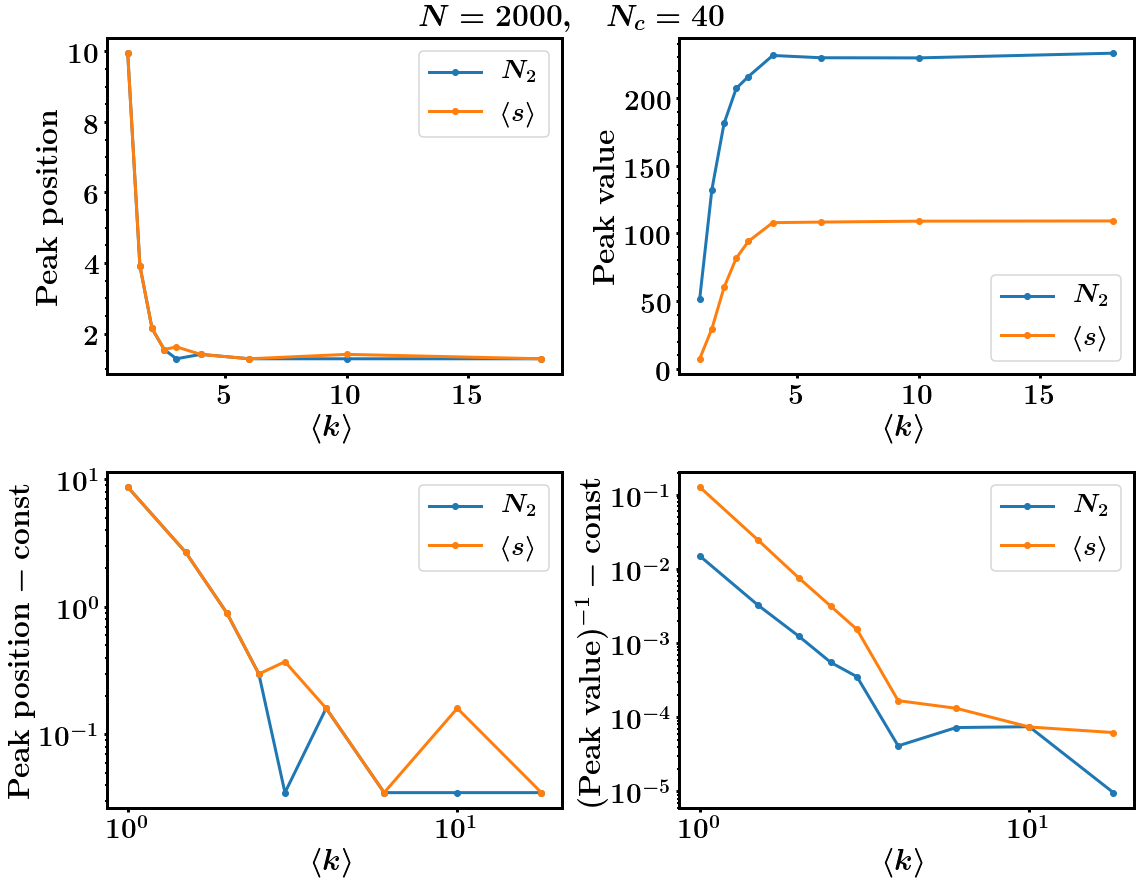

In [279]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)  
fig.suptitle(r'$N = {{{}}},\quad N_c = {{{}}}$'.format(N, Nc), fontsize=30,
             y=1.02)

ax = axes[0,0]
ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$\mathrm{Peak\;position}$')
ax.plot(max_df.k, max_df.N2pos, '-o', label=r'$N_2$')
ax.plot(max_df.k, max_df.meanSpos, '-o', label=r'$\langle s \rangle$')
ax.legend(loc='best')

ax = axes[1,0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$\mathrm{Peak\;position} - \mathrm{const}$')
if N == 2000 and Nc == 40:
    pos_inf = 1.25
elif N == 1000 and Nc == 20:
    pos_inf = 1.14
#pos_inf = 0
ax.plot(max_df.k, max_df.N2pos-pos_inf, '-o', label=r'$N_2$')
ax.plot(max_df.k, max_df.meanSpos-pos_inf, '-o', label=r'$\langle s \rangle$')
ax.legend(loc='best')

ax = axes[0,1]
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$\mathrm{Peak\;value}$')
ax.plot(max_df.k, max_df.N2, '-o', label=r'$N_2$')
ax.plot(max_df.k, max_df.meanS, '-o', label=r'$\langle s \rangle$')
#ax.fill_between(max_df.k, max_df.N2 - max_df.N2std, max_df.N2 + max_df.N2std, alpha=0.4)
ax.legend(loc='best')

ax = axes[1,1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\langle k \rangle$')
ax.set_ylabel(r'$(\mathrm{Peak\;value})^{-1} - \mathrm{const}$')

if N == 2000 and Nc == 40:
    N2_const = 0.00428
    meanS_const = 0.0091
elif N == 1000 and Nc == 20:
    N2_const = 0.0086
    meanS_const = 0.0182
    
ax.plot(max_df.k, 1/max_df.N2-N2_const, '-o', label=r'$N_2$')
ax.plot(max_df.k, 1/max_df.meanS-meanS_const, '-o', label=r'$\langle s \rangle$')
ax.legend(loc='best')

plt.tight_layout()
fig_name = 'perc_point_N{}_Nc{}_it{}_samples{}_{}'.format(
        N, Nc, iterations, samples, spacing
)
plt.savefig(os.path.join(figs_dir, fig_name) + '.png')
plt.savefig(os.path.join(draft_figs_dir, fig_name) + '.pdf')
plt.show()